# Digital signal processing - 6

| ** Title ** | Digital signal processing |
| --- | --- |
| ** Author ** | Alexander Kapitanov |
| ** Contact ** | sallador@bk.ru |
| ** Project lang ** | Python |
| ** Packages ** | numpy, scipy, matplotlib |
| ** License ** | GNU GPL 3.0 |


## Introduction

Here is a tutorial on the basics of ** digital signal processing ** using the Python programming language. It is assumed that the reader has basic knowledge of higher mathematics, as well as knows the Python language and at least superficially knows various python libraries - numpy / scipy, matplotlib and others.

For MATLAB / GNU Octave users, mastering the material from the point of view of the program code will not be difficult, since the main functions and their attributes are largely identical and similar to methods from python libraries.

### Signals and Filters

In the previous sections, we introduced the concept of signal, spectrum, Z-shape. In the process of passing a signal from source to destination, the data sequence undergoes changes and transformations. These transformations are due to the passage of a signal through various computing devices that implement one or another mathematical problem. In digital signal processing tasks, data passes through digital circuits called * filters *. Digital filters, like analog ones, have different characteristics. As a rule, these characteristics are expressed in frequency representation - amplitude-frequency and phase-frequency characteristics of the filter. Digital filters are used primarily to improve signal quality — to isolate a signal from a data sequence, or to degrade unwanted signals — to suppress certain signals in incoming sample sequences.

Today digital filters are used almost everywhere signal processing is required. Even primitive mathematical operations (multiplication and addition) can be represented as a digital filter. Therefore, all devices that surround us (computers, telephones, televisions, etc.) contain a number of certain digital filters. For example, TVs use filters to transform the displayed image. Adjusting brightness is essentially filtering the image.
Thus, digital filters are used in a wide range of signal processing tasks: spectral analysis, audio and video data processing, speech processing, motion processing, etc. When applied to DSP problems, a filter is some kind of mathematical system that changes the shape of an input signal (amplitude, phase, frequency).

** Benefits of digital filters **:

- Possibility of obtaining characteristics that cannot be obtained by analog methods (for example, an accurate linear phase response).
- Digital filters are more stable to external changes in the environment (temperature, humidity, pressure). Consequently, digital filters do not require constant calibration.
- Easy tuning of the signal processing frequency.
- Depending on the processing speed and signal frequency, one filter can simultaneously process data from several channels.
- The data before and after the filter can be saved to any medium. Analog signals are more difficult to record (in any case, conversion to digital form and vice versa is required).
- Low power consumption and low cost relative to analog filters.
- Increased computation accuracy (modern digital devices are not limited in computation accuracy).
- Ease of designing filters with complex frequency characteristics.
- In biomedicine problems, the use of analog filters at very low frequencies is difficult, in contrast to digital filters.

** Disadvantages of digital filters **

- ** Limited bit depth **. In the process of computation, digital filters with finite bit width accumulate quantization noise, rounding noise. One of the typical tasks of a DSP is to select a suitable filter width.
- ** Limiting the processing speed **. Typically, analog filters are capable of processing data at very high frequencies. Digital filters are limited to the sampling rate.
- **Hardware**. Since real signals in nature are continuous, ADCs and DACs are used to process them. The quality of the received digital (analog) signals also depends on the characteristics of these devices.

Signals and filters, depending on the presentation method, are characterized by different functions:

| ** Signal ** | ** Filter ** |
| --- | --- |
| samples $ x (n) $ | impulse response $ h (n) $ |
| z-form $ X (z) $ | transfer function $ H (z) $ |
| spectral density $ X (e ^ {j \phi}) $ | frequency response $ H (e ^ {j \phi}) $ |
| spectrum module $ \| X (e ^ {j \phi}) \| $ | Frequency response $ \| H (e ^ {j \phi}) \| $ |
| spectrum argument $ arg (X (e ^ {j \phi})) $ | Phase response $ arg (H (e ^ {j \phi})) $ | 


** Impulse response ** $ h (n) $ is the circuit's response to the input action in the form of the Dirac function (δ-function). It reflects the effect of the circuit on the signal. In digital devices, the impulse response can be finite or infinite. Consequently, there are two classes of digital filters - finite impulse response and infinite impulse response.

Digital filters are described by the difference equation:

$ y (k) = \frac {1} {a_0} \cdot (\sum_ {k = 0} ^ {N} b_ {k} x (nk) - \sum_ {k = 0} ^ {M} a_ { k} y (nk)) $

In this formula, $ y (k) $ is the output action or samples at the output of the digital filter. $ x (k) $ - input signal. $ a_ {k} $ and $ b_ {k} $ are multipliers (coefficients) of digital links at the input and output. These factors are also referred to as the numerator and denominator coefficients of the filter transfer characteristic.

The filter transfer characteristic is as follows:

$ H (z) = \frac {B (z)} {A (z)} = \frac {b_0 + b_ {1} z ^ {- 1} + ... + b_ {N} z ^ {- N }} {1 + a_ {1} z ^ {- 1} + ... + a_ {M} z ^ {- M}} $

where $ N $ and $ M $ are the number of delay lines for the input and output signals. In general terms, this is an IIR filter formula. If the denominator is one, then the formula matches the expression for an FIR filter (open loop digital filter).

According to the implementation of a digital filter, two methods are distinguished: hardware and software. Hardware filters are implemented on FPGAs or specialized signal processors. Software filters are implemented using programs executed by a processor or microcontroller.

Filters can be recursive when the output count depends on the previous output and on the input, i.e. there is feedback in the circuit, or non-recursive, when the output sample depends only on the input samples.

### IIR and FIR filters

** FIR filter ** (English FIR - "finite impulse response") is a digital filter with a finite impulse response. The impulse response of such a filter is limited in time, that is, it has a countable number of coefficients. Starting from a certain point in time, it becomes equal to zero. If a single pulse is applied to the input of the FIR filter, the output of the filter will be a finite number of samples. Typically, the phase response of a finite impulse response filter is linear.

In general, FIR filters are implemented without feedback, that is, they are non-recursive. However, using mathematical transformations, it is possible to convert the filter to a recursive form.

The difference equation of the FIR filter:

$ y (n) = \sum_ {k = 0} ^ {N-1} h (k) x (n-k) $

Where

- $ y (n) $ - discrete output signal (sum of weighted input pulses),
- $ x (n) $ - discrete input signal (sequence of samples),
- $ h (n) $ - filter impulse response coefficients,
- $ N $ - filter length (order).

FIR filter transfer characteristic:

$ H (z) = \sum_ {k = 0} ^ {N-1} h (k) z ^ {- k} $

Recall that the operation $ z ^ {- k} $ is the delay of the sequence by k-samples.

** IIR filter ** (English IIR - “infinite impulse response”) is a digital filter with an infinite impulse response in time, that is, it has a very large or infinite number of coefficients. IIR filters are also called recursive due to the fact that feedbacks are used in their implementation (the signal from the filter output through the delay elements goes to the filter and makes changes to itself). The IIR filter transfer function has a rational fractional form. The main known IIR filters are Chebyshev, Butterworth, Kalman, Bessel, etc.

Difference equation of the IIR filter:

$ y (n) = \sum_ {k = 0} ^ {N} b_ {k} x (n-k) - \sum_ {k = 1} ^ {M} a_ {k} y (n-k) $

or

$ y (n) = b_ {0} x (n) + b_ {1} x (n-1) + b_ {M} x (nM) + ... - a_ {1} y (n-1) - a_ {2} y (n-2) - ... - a_ {N} y (nN) $

As you can see, the output signal influences itself due to feedback.

IIR filter transfer characteristic:

$ H (z) = \frac {B (z)} {A (z)} = \frac {b_0 + b_ {1} z ^ {- 1} + ... + b_ {N} z ^ {- N }} {1 + a_ {1} z ^ {- 1} + ... + a_ {M} z ^ {- M}} $

Unlike FIR filters, IIR filters are not always robust. For the digital IIR filter to be stable, it is required that all the poles of the transfer characteristic are strictly less than one in absolute value (that is, lie inside the unit circle on the z-plane).

** Filter order ** - maximum degree in the expression of the transfer function $ H (z) $.

The transfer function can be implemented using various structural schemes. The most common are sequential and parallel block diagrams. If the transfer fractional-rational function of the recursive filter is represented as a product of transfer functions of the first and second order, then the block diagram will be * sequential *. If the transfer function of the recursive filter is represented as a sum of transfer functions of the first and second order, then the block diagram will be * parallel *.

## Canonical and direct schema

The block diagram of a digital filter can be represented in direct and canonical form. Digital filters can be implemented using three digital elements: a multiplier, an adder and a delay unit. Obviously, multipliers are required to multiply samples by the coefficients $ a_ {k} $ and $ a_ {k} $, and the adder combines the results obtained.

Block diagram of a non-recursive FIR filter, according to the equation:

<img src="https://raw.githubusercontent.com/capitanov/dsp-theory/master/img/fir_scheme.svg?sanitize=true" alt="FIR Common scheme" style="width: 70%;"/>

The number of delay lines is always one less than the number of coefficients or the order of the filter. The impulse response of an FIR filter matches the set of coefficients of this filter.

The IIR filter block diagram looks somewhat more complicated due to the presence of feedbacks:

<img src="https://raw.githubusercontent.com/capitanov/dsp-theory/master/img/iir_scheme.svg?sanitize=true" alt="IIR Common scheme" style="width: 70%;"/>

The number of IIR filter delay lines is $ N + M $.

The ** canonical ** block diagram minimizes the number of delay lines as it uses common delay lines. Input adder - with feedback. Output adder - summarizes the result. Converting from one form to another is simple and trivial.

<img src="https://raw.githubusercontent.com/capitanov/dsp-theory/master/img/iir_scheme2.svg?sanitize=true" alt="IIR scheme 2" style="width: 70%;"/>


### Filter selection

Designers of digital devices are often faced with the task of choosing the type of filter. The choice between FIR and IIR filters is made according to the following criteria:

- The phase response of the IIR filter is non-linear. FIR filters can have a strictly linear phase response. This means that such a filter does not distort the waveform.
- FIR filters are stable, because are implemented in a non-recursive form. IIR filters can be unstable.
- In real problems, the question is about the choice of data bit depth (rounding, quantization). These processes contribute less to open loop devices, that is, to FIR filters.
- Implementation of the frequency response of a complex shape or maximally rectangular shape will require a significant number of FIR filter coefficients. IIR filters do this better.
- FIR filters generally do not have equivalent analog filters.
- FIR filters allow you to easily obtain the required characteristics (attenuation level, ripple in the passband, cutoff frequency, etc.)
- IIR filters are significantly more economical in terms of the number of multiplication, addition and the number of delay lines.

### Example

Let there be a filter described by the following transfer function:

$ H (z) = \frac {b_0 + b_ {1} z ^ {- 1} + b_ {2} z ^ {- 2}} {1 + a_ {1} z ^ {- 1} + a_ {2 } z ^ {- 2}} $,

Where

- $ N = 2, M = 2 $
- $ b_ {i} = \{0.1, -0.6, 0.5 \} $
- $ a_ {i} = \{1, 0.7, -0.2 \} $

The number of difference equations for a particular filter is equal to the number of adders in the circuit. Knowing the difference equation, you can find the impulse response of the filter: a unit impulse is applied to the input (initial conditions are zero)

Let's find the impulse response using Python. The function `lfilter (b, a, x)` simulates the process of passing the signal `x` through a digital filter, with the transfer characteristic coefficients `a` and `b`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

%matplotlib inline

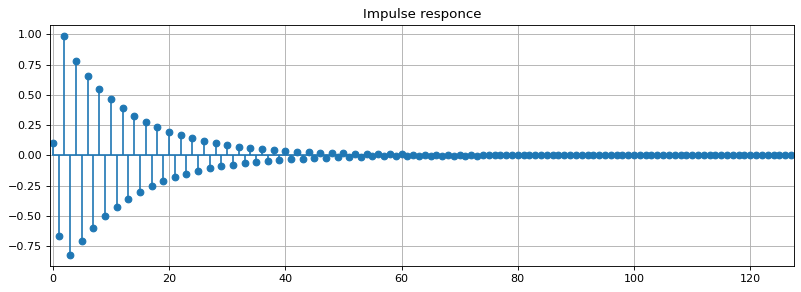

In [2]:
N = 128
# Delta-function
x = np.zeros(N)
x[0] = 1

# Input signal:
# h(z) = [b0 + b1*z^(-1) + b2*z^(-2)] / a0 + a1*z^(-1) + a2*z^(-2)
b = [0.1, -0.6, 0.5]
a = [1, 0.7, -0.2]

y1 = lfilter(b, a, x)

plt.figure(figsize=(12, 4), dpi=80)
plt.title('Impulse responce')
plt.stem(y1, use_line_collection=True, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.grid(True)

** If the filter is stable, then the y (n) counts decrease in value over time **.

As you can see in the previous graph, the calculated IIR filter is stable.

### IIR Filters (SCIPY / MATLAB)


Below is a list of the basic IIR filter functions to be implemented in python using the signal package - scipy.signal. Most of the functions have similar MATLAB prototypes.

| ** Function ** | ** Description ** |
| --- | --- |
| `iirdesign(wp, ws, gpass, gstop [, analog, ...])` | Function for complete digital filter calculation. Returns the coefficients `a, b`, zeros and poles, etc. |
| `iirfilter(N, Wn [, rp, rs, btype, analog, ...])` | Implementation of the IIR filter of the selected type and N-order. Returns the coefficients `a, b`, zeros and poles, etc. |
| `butter(N, Wn [, btype, analog, output, fs])` | Butterworth filter. Implements an N-order filter and returns the filter coefficients. |
| `buttord(wp, ws, gpass, gstop [, analog, fs])` | Returns the minimum order required to implement the filter |
| `cheby1(N, rp, Wn [, btype, analog, output, fs])` | Chebyshev type 1 filter. Implements an N-order filter and returns the filter coefficients. |
| `cheb1ord(wp, ws, gpass, gstop [, analog, fs])` | Returns the minimum order required to implement the filter |
| `cheby2(N, rs, Wn [, btype, analog, output, fs])` | Chebyshev type 2 filter. Implements an N-order filter and returns the filter coefficients. |
| `cheb2ord(wp, ws, gpass, gstop [, analog, fs])` | Returns the minimum order required to implement the filter |
| `ellip(N, rp, rs, Wn [, btype, analog, output, fs])` | Elliptical IIR Filter (Cauer) |
| `ellipord(wp, ws, gpass, gstop [, analog, fs])` | Returns the minimum order required to implement the filter from the values ​​of the input arguments |
| `bessel(N, Wn [, btype, analog, output, norm, fs])` | IIR Bessel filter. |
| `iirnotch(w0, Q [, fs])` | ** Barrier ** filter. Returns the coefficients `a, b`. Input arguments - signal frequency, Q factor and cutoff frequency |
| `iirpeak(w0, Q [, fs])` | ** Bandpass ** filter. The function returns the coefficients `a, b` of the second order filter. Input arguments - signal frequency, Q factor and cutoff frequency |

____

### Butterworth Filter

An example of implementation of ** Butterworth filter ** 3 orders. Let's show how a noisy signal passes through such a filter:

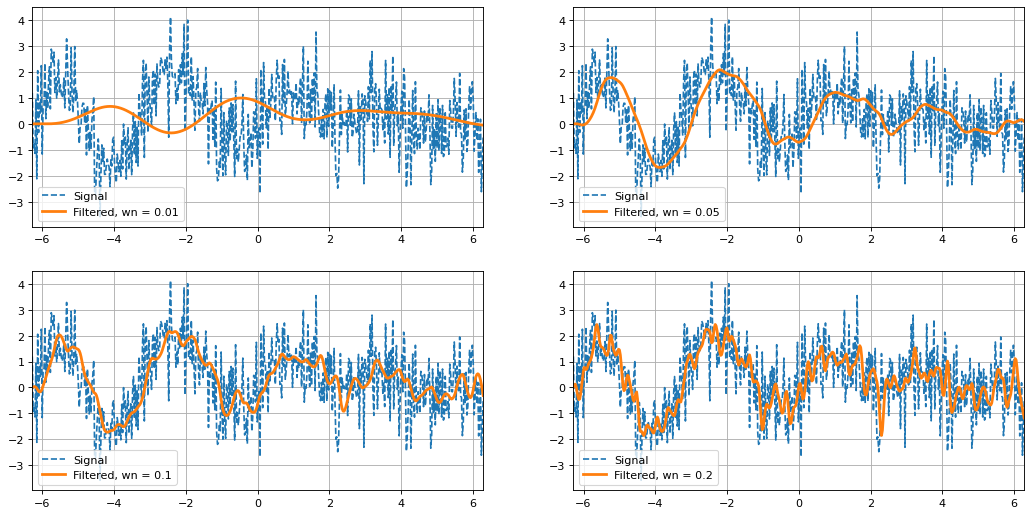

In [3]:
# Create input signal
t = 2 * np.pi * np.linspace(-1, 1, 500)
x = np.sin(0.25*t*t)+ 0.95*np.sin(2.0*t)

# Add some white noise
np.random.seed(1)
xn = x + np.random.randn(len(t))

# 3-order lowpass butterworth filter
b, a = butter(3, 0.2)
z = lfilter(b, a, xn)

wn = [0.01, 0.05, 0.1, 0.2]

# Calculate IIR filter
zz = np.zeros((t.size, 4))
for i in range(4):
    b, a = butter(3, wn[i])
    zz[:, i] = lfilter(b, a, xn)

# Plot results
plt.figure(figsize=(16, 8), dpi=80)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(t, xn, 'C0--', linewidth=1.5)
    plt.plot(t, zz[:,i], 'C1', linewidth=2.5)
    plt.xlim([-2 * np.pi, 2 * np.pi])
    plt.grid(True)
    plt.legend(('Signal', 'Filtered, wn = {}'.format(wn[i])), loc='lower left')

### Recursive FIR Filters

As mentioned earlier, FIR filters are mostly built in a non-recursive form, but there are ways to convert filters to a recursive form.

Consider the following example. Let's write down the transfer characteristic of the filter:

$ H (z) = 1 + z ^ {- 1} + z ^ {- 2} + z ^ {- 3} $,

We multiply the transfer function by

$ \frac {1 - z ^ {- 1}} {(1 - z ^ {- 1}} $.

Let's skip the mathematical calculations (if desired, this can be done independently due to the triviality of the problem under consideration) and write the result:

$ H (z) = \frac {1 + z ^ {-3}} {1 - z ^ {-1}} $

The block diagram of such a filter is shown in the following figure. It consists of two circuits: a link without feedback is a differentiating one, and a link with a feedback is an integrating one (an adder with a feedback).

<img src = "https://raw.githubusercontent.com/capitanov/dsp-theory/master/img/fir_recursive.svg?sanitize=true" alt = "FIR Recursive" style = "width: 70%;"/>

Let us show that a signal passed through a recursive FIR filter has similar characteristics.

In [4]:
N = 25
# Delta-function
x = np.zeros(N)
x[0] = 1

# Filter order - M
M = 16
# Input signal
# h(z) = 1 + z^(-1) + ... + z^(-9)
b = np.ones(M-1)
a = [1]

y1 = lfilter(b, a, x)

# Change to recursive form
b = np.zeros(M)
b[0] = 1
b[M-1] = -1

a = [1, -1]
y2 = lfilter(b, a, x)

# Check the difference
np.all(y1 == y2)

True

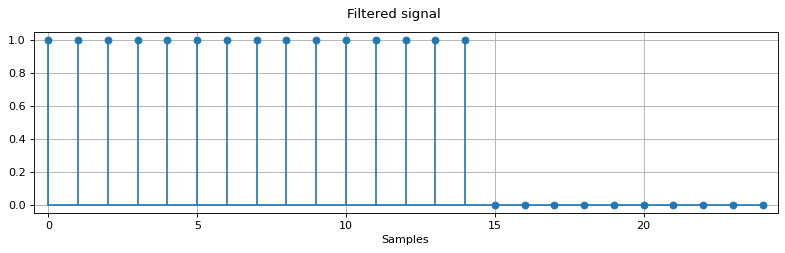

In [5]:
plt.figure(figsize=(12, 3), dpi=80)
plt.stem(y2, use_line_collection=True, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.xlabel('Samples')
plt.suptitle('Filtered signal')
plt.grid(True)

As you can see from the graph, the impulse response of the recursive filter is equal to a vector of ones. Moreover, the vector length is equal to the filter length.

### Homogeneous FIR Filters

These FIR filters are called ** homogeneous **. To implement these filters, a multiplication operation is not required; therefore, the filter works fairly quickly and is fairly well implemented on FPGAs.

The disadvantage of such filters is the high level of side lobes. The side lobes of the frequency response are suppressed by cascading the filters, while the position of the zeros does not change, but only the ratio of the levels of the main and side lobes changes, the relative level of the side lobes decreases when the frequency response is multiplied.

The second disadvantage of homogeneous filters is ** non-rectangular ** frequency response shape. To make it more rectangular, an FIR equalization filter is used, so the shape of the main lobe becomes more rectangular, but the level of the side lobes increases.

In the section related to ** decimation and interpolation ** of signals, we will take a closer look at these filters.

The `freqz` function can be used to find the frequency response of the filter.

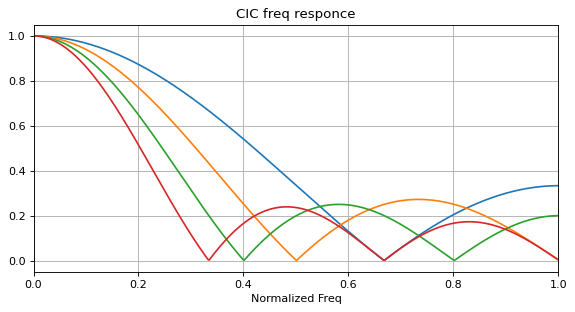

In [6]:
N = 512
f = np.linspace(0, 1, N, endpoint=True)
b = [1, 1, 1]

plt.figure(figsize=(14, 4), dpi=80)
plt.subplot(1, 2, 1)
for i in range(4):
    _, h = freqz(b, N)
    h = np.abs(h)
    plt.plot(f, h/np.max(h))
    plt.xlim([0, 1])
    plt.grid(True)
    b.append(1)
plt.xlabel('Normalized Freq')
plt.title('CIC freq responce')
plt.tight_layout()

### FIR filters with linear phase response

The most important feature of FIR filters is the ability to obtain accurate ** linear phase response **.

Why is it important? The signal, when passing through the filter, undergoes various transformations. In particular, the amplitude and phase of the signal change depending on the frequency response of the filter (amplitude, frequency response and phase, phase response). For multifrequency signals, it is unacceptable that when passing through digital processing units, the signal phase is distorted. Moreover, if the frequency response in the passband is almost constant to be made, then problems arise with the phase response.

To estimate phase distortions, it is convenient to introduce the concepts of phase and group delays.

** Phase delay ** is the amount of delay for each of the frequency components of the signal. Defined as the phase angle divided by the frequency.

$ \tau _ {\phi} = - \theta (\omega) / \omega $

** Group delay ** is the average time delay of the entire multi-frequency signal. Defined as the derivative of the phase with respect to frequency.

$ \tau_ {g} = - d \theta (\omega) / \omega $

From the formula for the group delay, the condition ** linearity of the PFC ** filter is obvious. Rule:

** If the phase response is linear, then the group delay after taking the derivative is equal to a constant **

In other words, the group delay is constant for ** all ** frequency components. Thus, phase linearity is one of the most important features of FIR filters.

### Impulse response symmetry

To ensure the linearity of the phase response, it is necessary to fulfill the condition ** symmetry of the impulse response ** (or coefficients) of the filter. Simply put, a linear phase response FIR filter is symmetrical. There are 4 types of filters, differing in filter order parity N and symmetry type:

- positive symmetry, even order,
- negative symmetry, even order,
- positive symmetry, odd order,
- negative symmetry, odd order.

For example, for filters with negative symmetry, you can get a phase shift of $ \frac {\pi} {2} $. Such filters are used to design differentiators and ** Hilbert transform **.

The envelope of the impulse response of the FIR filter is built according to the ** ~ sin (x) / x ** law regardless of the filter type (low pass, high pass, differentiator, band pass or notch filter). To solve practical problems, you don't have to think about what type of filter is selected.

### Designing FIR Filters

In most cases, the "calculation of the FIR filter" means the search for its ** coefficients ** by the values ​​of the frequency response.

When creating a new digital FIR filter, an engineer goes through certain stages of development:

- ** Filter specification **. The type of filter (LPF, HPF, bandpass, notch), the number of coefficients ** N **, the required frequency response, with tolerances for nonlinearity in the attenuation band and passband, etc. is set. 

- ** Calculation of coefficients **. By any available methods and means, the filter coefficients are calculated that satisfy the specifications from the previous paragraph. 

- ** Analysis of the consequences of the final bit depth **. This step evaluates the impact of quantization effects on filter coefficients, intermediate data, and output data.

- ** Implementation **. At this stage, the filter is developed by hardware or software: in an accessible programming language or based on FPGAs or special signal processors.

The design stages may be slightly different, but the essence of digital FIR filter design is always the same.

### Filter specification

At this stage, the engineer searches for compromise solutions to implement the required FIR filter with the required parameters. There are few of them, but often you have to sacrifice one parameter to achieve the required values ​​for other values.

- $ A_ {pass} $ - non-uniformity in the bandwidth,
- $ A_ {stop} $ - attenuation level in the suppression band,
- $ F_ {pass} $ - bandwidth cutoff frequency,
- $ F_ {stop} $ - cutoff frequency,
- $ N $ - filter order (number of filter coefficients).

In practice, the parameters $ A_ {pass} $ and $ A_ {stop} $ are given in decibels (dB), and the distance between $ F_ {pass} $ and $ F_ {stop} $ expresses the filter transition bandwidth. It is logical that the value of $ A_ {pass} $ should be as small as possible, $ A_ {stop} $ as large as possible, and the ratio $ F_ {pass} / F_ ​​{stop} $ ideally tends to unity (ideally rectangular frequency response).

The number of coefficients is not in vain entered into the filter specification. As will be shown below, the filter's frequency response parameters depend on the filter order N and the bit width of the coefficients.

### Calculating filter coefficients

There are many methods for calculating filter coefficients - the method of weighting by window functions, the method of frequency sampling, various optimal (according to Chebyshev) methods using the Remez algorithm, etc. All methods are unique in their characteristics and give certain results. For the method of window weighting, the ** Gibbs effect ** becomes a negative manifestation, introducing unevenness and spikes in the frequency response of the filter between the calculated points of the function. You can fight it endlessly and to no avail, but in practice, tolerances for unevenness in the passband and suppression band are introduced.

The main method for calculating coefficients for many filters is the modified ** Remez algorithm ** - "Parks-McClellan algorithm". It is an indirect iterative method for finding optimal values ​​with a Chebyshev filter response. The peculiarity of the method is to minimize the error in the attenuation band and passband by means of the Chebyshev approximation of the impulse response.

It is quite logical that the greater the number of coefficients, the less the frequency response unevenness and the more rectangular it is. The final result depends on the choice of the method, but they all boil down to the same goals - minimizing emissions in the passband and increasing the "squareness" of the frequency response (while maintaining the linearity of the phase response).

### Analysis of the consequences of finite bit depth

** The bit width of the coefficients ** is the main factor that determines the type of frequency response. Using the example of modern programmable logic integrated circuits (PLI), the bit width of the coefficients can be chosen any, but the real values ​​lie in the range from 16 to 27 bits due to the peculiarity of the implementation of computing units (DSP48).

For high filter orders, it is often required to provide a large dynamic range of the bit grid, but if this cannot be done, quantization errors begin to appear sooner or later. Due to the limited bit width of the coefficients, the frequency response is modified, and in some cases it is distorted so much that you have to sacrifice the parameters from the frequency specification to achieve an acceptable result. One way or another, the bit depth of the representation of the coefficients directly affects the maximum possible attenuation of $ A_ {stop} $. Therefore, when using too limited bit grid of coefficients, sometimes it is impossible to achieve the desired suppression even with huge filter orders!

### Implementation

With the help of modern libraries in different programming languages ​​(C ++, Python, MATLAB, etc.), the software implementation of FIR filters is not difficult. However, hardware implementation on microcontrollers or FPGAs is a complex and non-trivial task.

Implementation of the simplest FIR filters requires delay, multiplication by coefficients, and addition of product results. The main node that implements the FIR filter on the FPGA is an integer DSP block. All mathematical operations take place in this block - multiplication of input samples with filter coefficients, delay of the input signal, data addition. Modern DSP nodes contain a pre-adder, so even summing operations for symmetric IC filters can be done inside this node. In addition to the DSP block, the filter needs memory to store coefficients and implement a delay link. As a rule, FPGAs have more than enough of these resources.
____

## Calculating FIR Filters in Python

** Software implementation of the FIR filter - search for impulse response coefficients **.

FIR filters are calculated using some functions from the `scipy.signal` package. We list all the methods for designing FIR filters and consider each of them in detail.

| ** Function ** | ** Description ** |
| --- | --- |
| `firls(numtaps, bands, desired [, weight, nyq, fs])` | Calculating an FIR Filter Using Least Squares |
| `firwin(numtaps, cutoff [, width, window, ...])` | Implementation of an N-order FIR filter using a window function. Sets the cutoff frequency. |
| `firwin2(numtaps, freq, gain [, nfreqs, ...])` | Filter calculation using a window function. A set of normalized frequencies and amplitudes is set at these frequencies |
| `remez(numtaps, bands, desired [, weight, Hz, ...])` | Calculation of the optimal filter using the Remez algorithm |
| `group_delay(system [, w, whole, fs])` | Helper function for calculating group delay. Input parameters - array of coefficients `a, b` |
| `get_window(window, Nx, fftbins = True) [source]` | Returns the coefficients of a window function of the required length |


#### Calculating FIR Filter Using Least Squares Method

Using the least squares method, this function calculates the coefficients of the filter that best approximates the desired frequency response. Mathematically, in the search for the coefficients, the integral of the weighted root mean square error within the bandwidth is minimized.

The firls method returns the coefficients of the FIR filter. Function input arguments:

 - `numtaps` - filter order,
 - `bands` - monotonous non-decreasing sequence of frequencies. All elements must be non-negative and less than or equal to the Nyquist frequency specified by the `nyq` parameter.
 - `desired` - a sequence of amplitudes containing the required gain and attenuation at the specified frequency values ​​from the` bands`.
 - `weight` - the relative" weight "of the bandwidth and suppression bands. Specifies a quality tradeoff in these bands.
 - `nyq` or` fs` - Nyquist frequency. If not specified, it defaults to one.


#### Calculation of the FIR filter using the Remez algorithm:

The remez method returns the coefficients of the FIR filter. The input arguments are identical to the previous method:

 - `numtaps` - filter order,
 - `bands` - monotonous non-decreasing sequence of frequencies. All elements must be non-negative and less than or equal to the Nyquist frequency specified by the `nyq` parameter.
 - `desired` - a sequence of amplitudes containing the required gain and attenuation at the specified frequency values ​​from the` bands`.
 - `weight` - the relative" weight "of the bandwidth and suppression bands. Specifies a quality tradeoff in these bands.
 - `Hz` or` fs` - Nyquist frequency. If not specified, it defaults to one.

#### Calculation of the FIR filter using the window method:

The `firwin` and` firwin2` methods return the coefficients of the FIR filter.

** The firwin method **

 - `numtaps` - filter order,
 - `cutoff` - cutoff frequency relative to sampling frequency` fs`.
 - `width` - if a value is specified, it shows the width of the transition from the passband to the suppression band.
 - `window` - window function. It is used in conjunction with the `get_window` method or directly sets the window name.
 - `fs` - sampling rate or Nyquist frequency. If not specified, it defaults to one.

** The firwin2 method **

 - `numtaps` - filter order,
 - `freq` - monotonic non-decreasing sequence of frequencies. All elements must be non-negative and less than or equal to the Nyquist frequency specified by the `fs` parameter.
 - `gain` - a sequence of amplitudes containing the required gain and attenuation at the given frequency values ​​from` freq`.
 - `window` - window function. It is used in conjunction with the `get_window` method or directly sets the window name.
 - `fs` - sampling rate or Nyquist frequency. If not specified, it defaults to one.

#### Window function

A separate section is devoted to window functions and their features, but we will list the most used window functions in practical tasks: Kaiser, Gauss, Blackman-Harris, flat-top window, Hamming, Hanna, etc.

The `get_window` method is used to select a window function. Input arguments are window name and impulse response length.

The function returns a one-dimensional array of coefficients - impulse response values. These coefficients are convolutionally "superimposed" on the impulse response of the FIR filter.

#### Group delay

This is an auxiliary function for calculating the group delay of digital filters. Input parameters - array of coefficients `a, b`. The method returns a set of frequencies and a corresponding array of group delays for these frequencies.
____

### Examples

The first example is using the `firwin2` function. Let's set the array of normalized frequencies from 0 to 1. Let's set the gain at the selected frequencies, as well as the order of the filter. Let's build an impulse response.

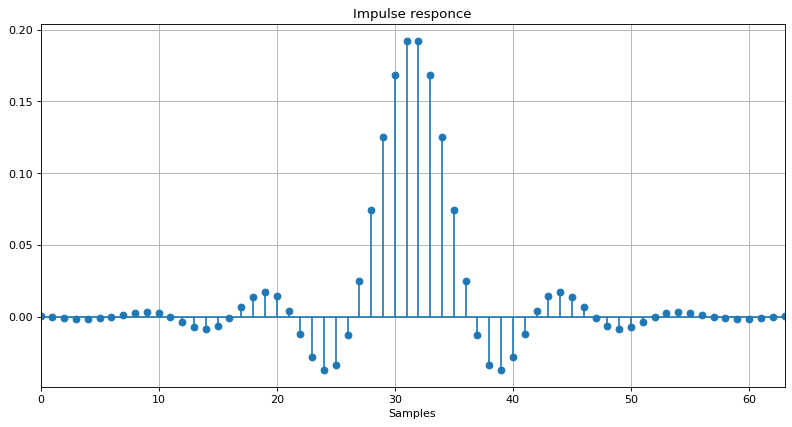

In [7]:
N = 100
# List of freqs
lst_freqs = np.linspace(0, 1, N)

# List of gains
lst_gain = np.zeros(N)
lst_gain[0:20] = 1

# FIR filter taps
NFIR = 64
taps = firwin2(NFIR, lst_freqs, lst_gain)

plt.figure(figsize=(12, 6), dpi=80)
plt.title('Impulse responce')
plt.stem(taps, use_line_collection=True, basefmt='C0')
plt.xlim([0, NFIR-1])
plt.xlabel('Samples')
plt.grid(True)

Let's build the frequency response of a bandpass filter and a low-pass filter using three methods: `firls(), remez(), firwin2()`.

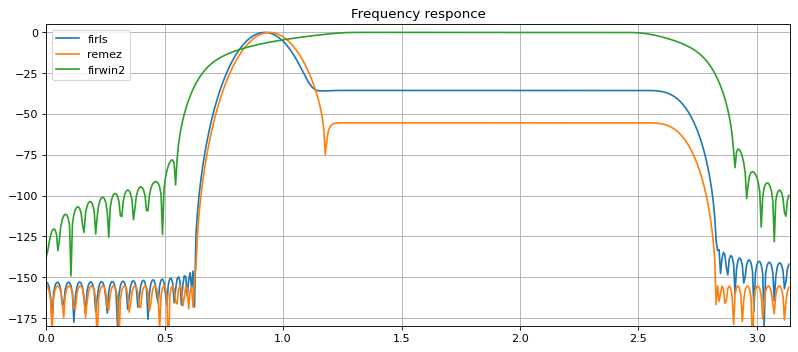

In [8]:
# Input parameters
fs = 10
N = 117
desired = (0, 0, 1, 1, 0, 0)
bands = (0, 1, 2, 4, 4.5, 5)

# FIR filters
fir_firls = firls(N, bands, desired, fs=fs)
fir_remez = remez(N, bands, desired[::2], fs=fs)
fir_firwin2 = firwin2(N, bands, desired, fs=fs)

# PLot results and calculate FFTs
plt.figure(figsize=(12, 5), dpi=80)
plt.title('Frequency responce')
for fir in (fir_firls, fir_remez, fir_firwin2):
    freq, resp = freqz(fir)
    resp = np.abs(resp)
    resp /= np.max(resp) + 10**(-15)
    plt.plot(freq, 20*np.log10(resp))
plt.xlim([0, np.pi])
plt.ylim([-180, 5])
plt.legend(['firls', 'remez', 'firwin2'], loc ='upper left')
plt.grid(True)

### FIR Kaiser filter

Let's show the passage of a noisy harmonic signal through an FIR filter. We also add to this signal several high frequency harmonic signals of different amplitudes.

As you can see, the noisy signal in the time domain does not lend itself to any analysis. By passing such a signal through an FIR filter with a preselected cutoff frequency, you can isolate the signal of interest from the interference.

It should be noted that all signals and noise that fall into the filter passband remain and ** contribute ** to the quality characteristics of the resulting signal.

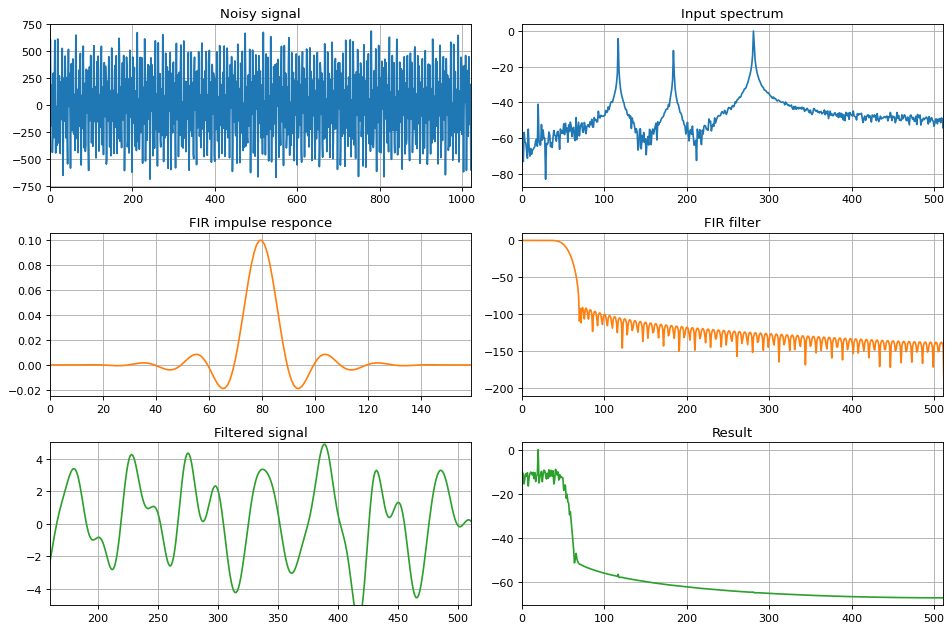

In [9]:
N = 1024
# Create input signal
t = np.linspace(0, 1, N, endpoint=True)
x = 3*np.cos(2*np.pi*20*t) + 210*np.sin(2*np.pi*117*t) + 100*np.sin(2*np.pi*184*t) + 380*np.sin(2*np.pi*281*t)

# Add some white noise
np.random.seed(1)
xn = x + 5*np.random.randn(N)

# Kaiser FIR filter
taps = 160
h = firwin(taps, 0.1, window=('kaiser', 9))
y = lfilter(h, 1, xn)

# List of input signals
lst_sig = [xn, h, y]

sig_titles = ['Noisy signal', 'FIR impulse responce', 'Filtered signal']
fft_titles = ['Input spectrum', 'FIR filter', 'Result']


plt.figure(figsize=(12, 8), dpi=80)
for i in range(3):
    # Calculate FFTs
    clc_fft = np.abs(fft(lst_sig[i], N)) 
    clc_fft = 20*np.log10(10e-11+clc_fft/np.max(clc_fft))
    
    # Plot signals
    plt.subplot(3, 2, 2*i+1)
    plt.plot(lst_sig[i], color='C'+str(i))
    plt.title(sig_titles[i])
    if (i == 2):
        plt.ylim([-5, 5])
        plt.xlim([taps, lst_sig[i].size//2-1])
    else:
        plt.xlim([0, lst_sig[i].size-1])
    plt.grid(True)
    
    plt.subplot(3, 2, 2*(i+1))
    plt.plot(clc_fft, color='C'+str(i))
    plt.title(fft_titles[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

In the above figure, you can see that the slightly distorted filtered output signal is similar to the harmonic signal you want to receive. Unfortunately, it is impossible to achieve an ideal harmonic waveform using FIR or IIR filtering, since the main task of the filter is to cut off unnecessary spectral components. To improve the quality of the filtered signal, other methods of digital signal processing (spectral and correlation) are used.

This concludes the section on digital filtering. The following sections will describe in detail window functions, tasks of multirate signal processing - decimation and interpolation, calculation of a filter-corrector, etc.